### set folder_name and `num_trials`
- `num_trials` and `threshold_shift` based on preprocessing alignment (see PreprocessLeverData notebooks) and can be found for each day's session in the Google sheets analysis log

In [111]:
name = 'ANB2'
session = '20231211_d22'
num_trials = 176
threshold_shift = -0.0

In [112]:
hit_trials_to_exclude = []

### imports:

In [113]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import scipy.signal as signal
import scipy.interpolate as interpolate
import pickle
import glob # find files in a directory
import re # regex for string parsing

from common.set_matplotlib_settings import set_matplotlib_settings
from common.load_tonedisc_matfile import load_tonedisc_matfile
from common.select_trials import select_hit_trials
from common.select_trials import save_custom_hit_trials
from common.select_trials import select_custom_hit_trials
from hit_movements.get_movement_thresholds import get_movement_thresholds
from hit_movements.extract_leverpresses import extract_leverpresses
from common.extract_movement_intervals import extract_movement_intervals

### Setup folders and matfiles

In [114]:
tone_discriminiation_matfile = '../Data_Copy/ToneDiscrimination/'+name+'/ToneDisc_'+name+'_'+session+'.mat'
params, response, respMTX, MTXTrialType = load_tonedisc_matfile(tone_discriminiation_matfile)

PreprocessLeverData_folder = "../Data_Copy/AnalysisData/"+name+"/PreprocessLeverData_"+name+"_"+session+"/"
output_folder = "../Data_Copy/AnalysisData/"+name+"/HitMovements_"+name+"_"+session+"/"
!mkdir {output_folder}

respMTX shape: (176, 7)
MTXTrialType shape: (1000, 5)
number of trials: 176
mkdir: ../Data_Copy/AnalysisData/ANB2/HitMovements_ANB2_20231211_d22/: File exists


### find all movements from trials that meet all thresholds

select all hit trials for consideration

In [115]:
hit_trials = select_hit_trials(respMTX, num_trials)
save_custom_hit_trials(output_folder, hit_trials)

101  hit trials in this session.


delete trials as necessary and resave

In [116]:
for trial_index in hit_trials_to_exclude:
    hit_trials.remove(trial_index)
save_custom_hit_trials(output_folder, hit_trials)
hit_trials = select_custom_hit_trials(output_folder)

101  hit trials in this session.


_Note that /0.0049 *5 /1023 converts from VBP's voltage to LeverData voltage_

In [117]:
movement_baseline, movement_threshold, no_movement_threshold = get_movement_thresholds(params, respMTX, threshold_shift)

movement_baseline for all trials should be the same:  2.7638807429130017
mvt threshold:  0.15959462964071258 + movement_baseline =  2.9234753725537144
nomvt threshold:  0.09974664352544539 + movement_baseline =  2.863627386438447


`leverpress_informations`: each selected trial has a row

columns are `trial_index` |  `leverpress_left_index` sample when leverpress starts | `leverpress_right_index` sample when leverpress ends

In [118]:
hit_leverpress_informations = extract_leverpresses(hit_trials, PreprocessLeverData_folder, \
                                              movement_baseline, movement_threshold, no_movement_threshold,\
                                                output_folder)

Checking trial  0 ...
leverpress detection was at below first threshold, try moving leverpress index up...
new leverpress index value:  2.925294810694989
finding right threshold...
met
finding left threshold...
met
Checking trial  3 ...
finding right threshold...
met
finding left threshold...
met
Checking trial  12 ...
finding right threshold...
met
finding left threshold...
met
Checking trial  13 ...
finding right threshold...
met
finding left threshold...
met
Checking trial  15 ...
finding right threshold...
met
finding left threshold...
met
Checking trial  16 ...
finding right threshold...
met
finding left threshold...
met
Checking trial  17 ...
finding right threshold...
met
finding left threshold...
met
Checking trial  18 ...
finding right threshold...
met
finding left threshold...
met
Checking trial  19 ...
finding right threshold...
met
finding left threshold...
met
Checking trial  20 ...
finding right threshold...
met
finding left threshold...
met
Checking trial  22 ...
finding

### Save movements from `movements` into separate "movement_trial#" .npy files
`movement`: first row is times, second row is leverdata

Movements will have MVT0 subtracted off and be temporally aligned to be comparable

In [119]:
hit_movements = extract_movement_intervals(hit_leverpress_informations, \
                                           'processed', PreprocessLeverData_folder, PreprocessLeverData_folder, output_folder, \
                                            movement_baseline)

check by plotting movements that are MVT0 subtracted and temporally aligned:

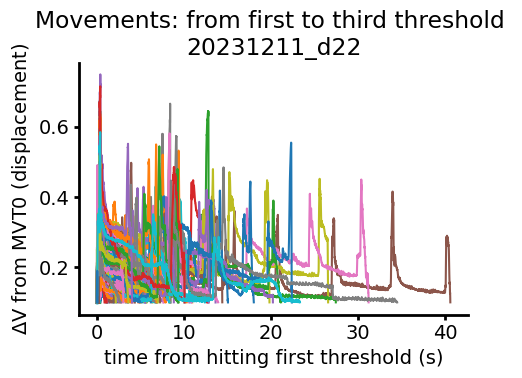

In [120]:
set_matplotlib_settings()

for hit_movement in hit_movements:
    # also check by plotting all of the movements
    plt.plot(hit_movement[0, :], hit_movement[1, :])
plt.title("Movements: from first to third threshold \n"+session)
plt.xlabel("time from hitting first threshold (s)")
plt.ylabel("$\Delta$V from MVT0 (displacement)")

plt.savefig(output_folder+"plot_movements.png")
plt.show()